In [1]:
import networkx as nx
from ensmallen_graph import EnsmallenGraph
import matplotlib.pyplot as plt

In [2]:
G = nx.gnp_random_graph(10, 0.3, random_state=47)

In [3]:
positions = nx.kamada_kawai_layout(G, )

In [4]:
sources, destinations = list(zip(*G.edges()))

In [5]:
graph = EnsmallenGraph(sources, destinations, False)

In [22]:
graph.report()

{'edges_number': '20',
 'strongly_connected_components_number': '2',
 'nodes_number': '10',
 'density': '0.2',
 'connected_components_number': '2',
 'unique_node_types_number': '0',
 'degrees_median': '2',
 'degrees_mean': '2',
 'traps_rate': '0',
 'unique_edge_types_number': '0',
 'selfloops_percentage': '0',
 'degrees_mode': '2',
 'bidirectional_percentage': '1'}

In [19]:
train, valid = graph.holdout(672, 0.6)

In [20]:
nx_original = nx.Graph()
nx_original.add_edges_from(zip(graph.sources, graph.destinations))
nx_original.add_nodes_from(graph.nodes_mapping.values())
nx_train = nx.Graph()
nx_train.add_edges_from(zip(train.sources, train.destinations))
nx_train.add_nodes_from(train.nodes_mapping.values())
nx_valid = nx.Graph()
nx_valid.add_edges_from(zip(valid.sources, valid.destinations))
nx_valid.add_nodes_from(train.nodes_mapping.values())

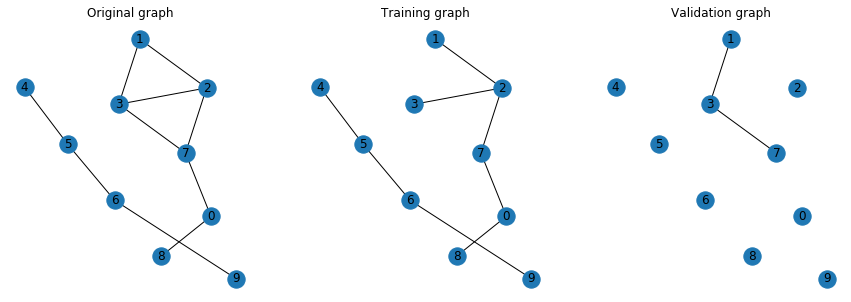

In [21]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes[0].set_title("Original graph")
nx.draw(nx_original, positions, ax=axes[0], with_labels=True)
axes[1].set_title("Training graph")
nx.draw(nx_train, positions, ax=axes[1], with_labels=True)
axes[2].set_title("Validation graph")
nx.draw(nx_valid, positions, ax=axes[2], with_labels=True)
fig.savefig("holdouts.jpg")
plt.show()